In [241]:
import random 
import numpy as np 
import math 
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

def hieralchical_cut_decomposition(X):
    dist_matix = distance_matrix(X, X)
    max_level = math.floor(math.log2(2*np.max(dist_matix))) +1 
    r = [random.uniform(0.5, 1.0)*2**i for i in range(max_level)]

    n = len(X)
    π = [i for i in range(n)]
    random.shuffle(π)
    
    tree = [[(random.randint(0,n-1), r[0], [i for i in range(n)])]]

    def eu_dist(a, b):
        return np.linalg.norm(np.array(a)-np.array(b))
    
    def create_children(level, parents):
        if level < 0:
            return 

        children  = []
        for _, _, parent_set in parents:
            S = set(parent_set) 

            for j in range(n):
                new_center = X[π[j]] 
                child_set = [i for i in S if eu_dist(new_center, X[i]) <= r[level]]
                
                if len(child_set)>0:
                    children.append((j, r[level], child_set))
                    for x in child_set:
                        S.remove(x)
        
        tree.append(children)
        create_children(level=level-1, parents=children)
    
    create_children(level=max_level-1, parents=tree[0])
    return tree 

def plot_tree(tree, X):
    fig, ax = plt.subplots()
    for i, layer in enumerate(tree):
        for center, radius, subset in layer:
            color = ((255/(i+1))/255, 50/255, 120/255)
            circle = plt.Circle(X[center], radius, fill=True, facecolor=color, edgecolor="black", linewidth=1)
            ax.add_artist(circle)
            ax.scatter(X[center][0], X[center][1], color="black")
    plt.show()

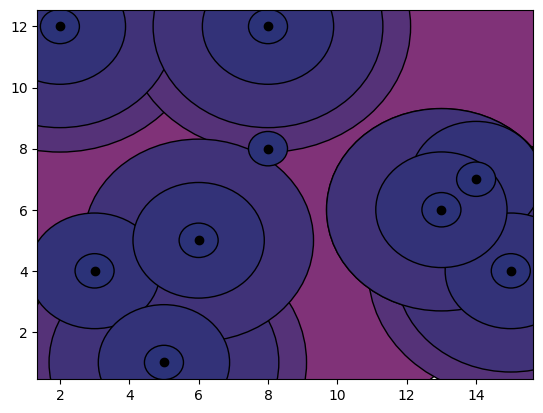

In [262]:
xs = [[2,12], [3,4], [5,1], [15,4], [6,5], [8,12], [13,6], [14,7], [8,8]]
tree = hieralchical_cut_decomposition(X=xs)
plot_tree(tree, xs)